<a href="https://colab.research.google.com/github/Hariomsmit/Predicting-Diabetes--ANN/blob/main/ANN_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**Prediction of Diabetes**

**Objective**

**Data Source**\
https://github.com/YBI-Foundation/Dataset


**Import Library**

In [ ]:
import pandas as pd

**Import Data**

In [ ]:
data=pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Diabetes.csv')


**Describe Data**

In [ ]:
data.head()


,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Data Visualization**

In [ ]:
data.describe()


,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.columns

Index(['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
       'dpf', 'age', 'diabetes'],
      dtype='object')

**Define Target Variable (y) and Feature Variables (X)**

In [ ]:
X = data[['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
       'dpf', 'age']]

In [ ]:
y = data['diabetes']

**Train Test Split**

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [ ]:
X.shape

(768, 8)

In [ ]:
X = ss.fit_transform(X)


**Modeling**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(9, input_dim = 8, activation = 'relu')) #First Layer

In [ ]:
model.add(Dense(12, activation = 'relu')) #Hidden layers in sequence as follows

In [ ]:
model.add(Dense(14, activation = 'relu'))

In [ ]:
model.add(Dense(10, activation = 'relu'))

In [ ]:
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile(loss = 'binary_crossentropy',optimizer = 'adam', metrics = [ 'accuracy'])


**Model Evaluation**

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 9)                 81        
                                                                 
 dense_18 (Dense)            (None, 12)                120       
                                                                 
 dense_19 (Dense)            (None, 14)                182       
                                                                 
 dense_20 (Dense)            (None, 10)                150       
                                                                 
 dense_21 (Dense)            (None, 1)                 11        
                                                                 
Total params: 544
Trainable params: 544
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X, y, epochs = 300, batch_size = 50, verbose = 1)

Epoch 1/300
16/16 [==============================] - 1s 2ms/step - loss: 0.6844 - accuracy: 0.6081
Epoch 2/300
16/16 [==============================] - 0s 2ms/step - loss: 0.6626 - accuracy: 0.6667
Epoch 3/300
16/16 [==============================] - 0s 2ms/step - loss: 0.6441 - accuracy: 0.6628
Epoch 4/300
16/16 [==============================] - 0s 2ms/step - loss: 0.6270 - accuracy: 0.6536
Epoch 5/300
16/16 [==============================] - 0s 2ms/step - loss: 0.6087 - accuracy: 0.6562
Epoch 6/300
16/16 [==============================] - 0s 2ms/step - loss: 0.5928 - accuracy: 0.6706
Epoch 7/300
16/16 [==============================] - 0s 2ms/step - loss: 0.5774 - accuracy: 0.6849
Epoch 8/300
16/16 [==============================] - 0s 2ms/step - loss: 0.5637 - accuracy: 0.6927
Epoch 9/300
16/16 [==============================] - 0s 2ms/step - loss: 0.5508 - accuracy: 0.7070
Epoch 10/300
16/16 [==============================] - 0s 2ms/step - loss: 0.5386 - accuracy: 0.7174
Epoch 11/

Text(0, 0.5, 'loss')

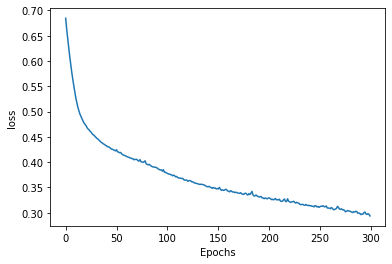

In [ ]:
import matplotlib.pyplot as plt
plt.plot(model.history.epoch, model.history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('loss')

After training model, we will predict and evaluate our model using the accuracy score. Also, we will plot out loss function to see if the model is converged correctly or not. If the graph gets more elbow shaped that means model have achieved maximum accuracy and it does not need more training.


**Prediction**

In [ ]:
y_pred = model.predict(X)

In [ ]:
y_pred

array([[5.41794717e-01],
       [2.17652321e-03],
       [7.40787268e-01],
       [3.06312654e-06],
       [9.44837749e-01],
       [3.26285362e-02],
       [3.45666349e-01],
       [8.14382136e-01],
       [9.99898672e-01],
       [7.28863597e-01],
       [8.65278840e-02],
       [8.41298938e-01],
       [1.35948062e-01],
       [9.57979679e-01],
       [7.95204997e-01],
       [1.60360605e-01],
       [8.20281863e-01],
       [4.52191651e-01],
       [7.54674673e-02],
       [8.07806969e-01],
       [1.64689660e-01],
       [1.28821492e-01],
       [9.89239693e-01],
       [5.12005687e-01],
       [9.25988257e-01],
       [5.79742789e-01],
       [8.31784785e-01],
       [4.54510700e-06],
       [2.65284181e-02],
       [9.09038186e-02],
       [1.08219802e-01],
       [9.51786757e-01],
       [1.24773869e-05],
       [1.98969245e-03],
       [5.27296424e-01],
       [9.72345471e-03],
       [6.14932835e-01],
       [5.05369186e-01],
       [7.35698044e-02],
       [4.79437798e-01],


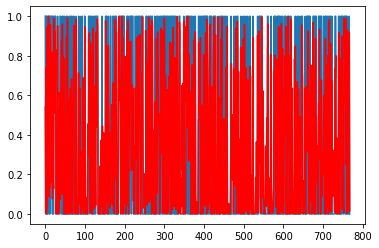

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y)
plt.plot(y_pred, color='r')
plt.show()

**Explaination**\
Hence the model has gained an accuracy of 85.29% which is a positive sign that our ANN model is ready for Diabetes Prediction.